In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/terrorismdataset/globalterrorismdb_0718dist.csv', encoding='latin1')

/tmp/ipykernel_47/4243349326.py:5: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/terrorismdataset/globalterrorismdb_0718dist.csv', encoding='latin1')


In [137]:
df.sample(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
119298,201307210005,2013,7,21,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""Bomb attacks hit outskirts of Baghdad,"" Al Ja...","""Death toll rises in Iraq weekend violence,"" A...","""Gunmen kill five Kurdish security forces in n...",START Primary Collection,-9,-9,0,-9,NaN
23737,198411130016,1984,11,13,NaN,0,NaN,61,El Salvador,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,"198411130016, 198411130017"
113135,201212220015,2012,12,23,NaN,0,NaN,4,Afghanistan,6,...,NaN,"""5 killed in separate security incidents,"" Paj...",NaN,NaN,START Primary Collection,-9,-9,1,1,NaN
117305,201305200013,2013,5,20,NaN,0,NaN,95,Iraq,10,...,NaN,"""Dozens die in Iraqi car bomb attacks,"" BBC, M...","""Car bomb blast kills at least 12 in Iraqi cap...","""Iraq Car Bomb Spree across Baghdad and Key Ci...",START Primary Collection,-9,-9,0,-9,NaN
157523,201601100036,2016,1,10,NaN,0,NaN,60,Egypt,10,...,NaN,"""IS militants set cleaning company ablaze in A...","""Assailants set fire in Arish garage; 40 vehic...","""Cleaning agency set ablaze in Arish following...",START Primary Collection,0,0,0,0,NaN
145314,201503070031,2015,3,7,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""Iraqi troops battle to advance in towns on ed...","""Breaking News ... Five civilians wounded in a...",NaN,START Primary Collection,-9,-9,0,-9,NaN
223,197004240002,1970,4,24,NaN,0,NaN,217,United States,1,...,The killings were part of a Black Panthers ini...,"George J. Hiltner, ""City Panther is Convicted ...","Laurie Willis, ""Judge Affirms 1972 Life Term,""...","George J. Hiltner, ""Panther Gets Life, 15 Year...",Hewitt Project,0,0,0,0,NaN
81421,200608290004,2006,8,29,NaN,0,NaN,153,Pakistan,6,...,NaN,"Bomb Blast Kills Four in Southwest Pakistan,...",NaN,NaN,CETIS,-9,-9,0,-9,NaN
99724,201101040002,2011,1,4,NaN,0,NaN,153,Pakistan,6,...,NaN,"South Asia Terrorism Portal, ""Three Persons Ki...","Right Vision News, Pakistan: Convoy of Fuel, ...","BBC Monitoring South Asia, Soldier Injured as...",ISVG,-9,-9,0,-9,NaN
179235,201709280028,2017,9,28,NaN,0,NaN,37,Cameroon,11,...,NaN,"""Landmine explosion kills 2 Cameroon soldiers,...","""SOCAFRICA: Native Prospector West Africa VEO ...",NaN,START Primary Collection,1,1,0,1,NaN


In [138]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [140]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [142]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [143]:
rows, cols = df.shape
print(f'There are {rows} rows and {cols} columns in the dataset.')

There are 181691 rows and 135 columns in the dataset.


In [144]:
df.rename(columns={'eventid':'EventID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [145]:
df=df[['EventID','Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [146]:
df.head()

,EventID,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


array([[<Axes: title={'center': 'EventID'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'Killed'}>,
        <Axes: title={'center': 'Wounded'}>, <Axes: >]], dtype=object)

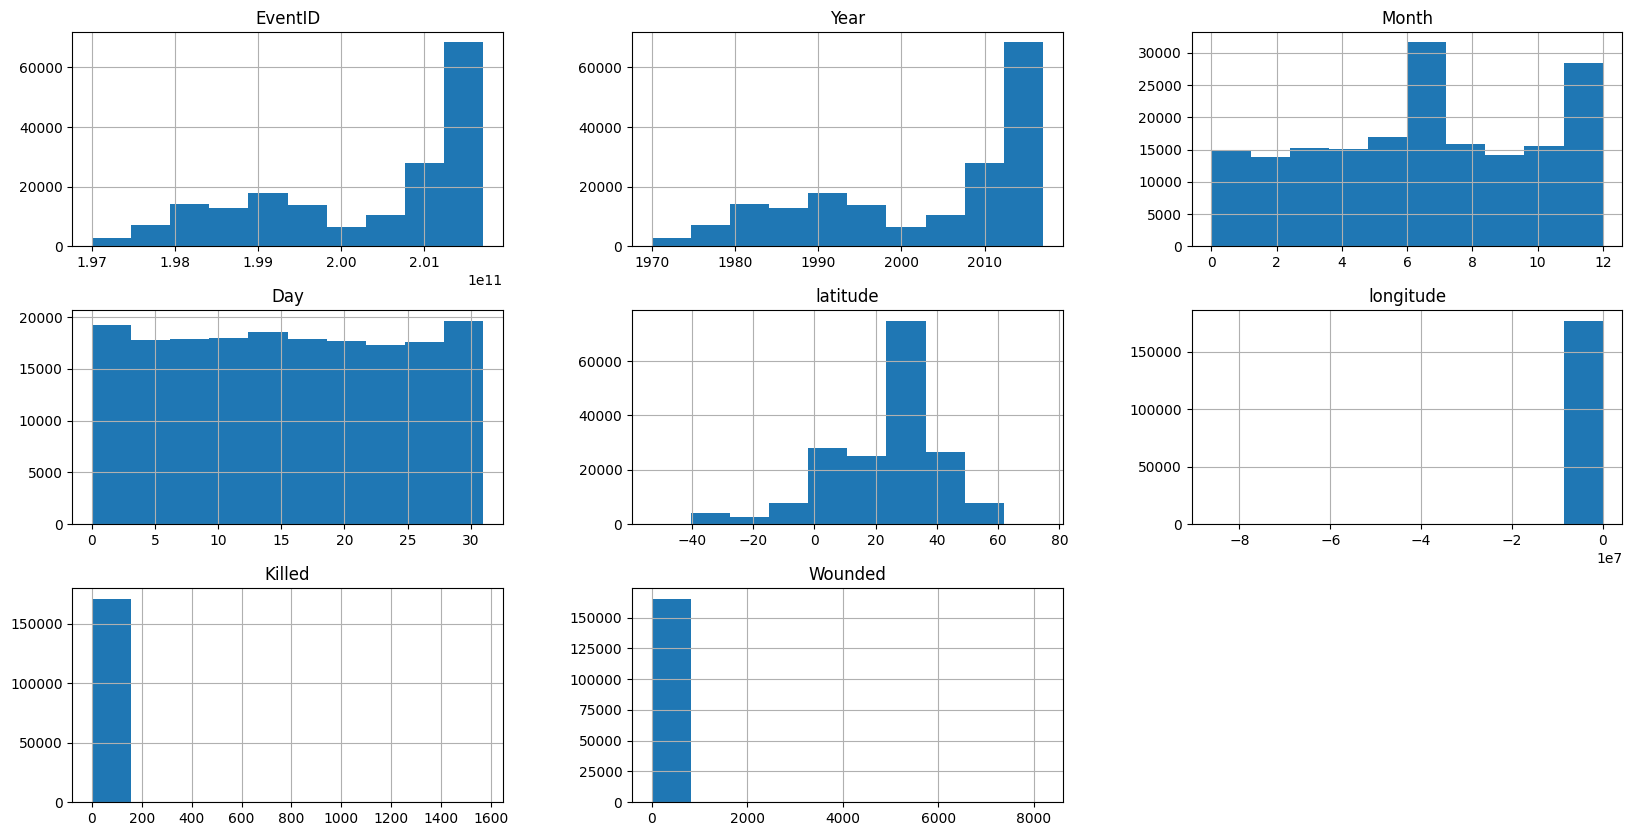

In [147]:
df.hist(figsize=(20,10))

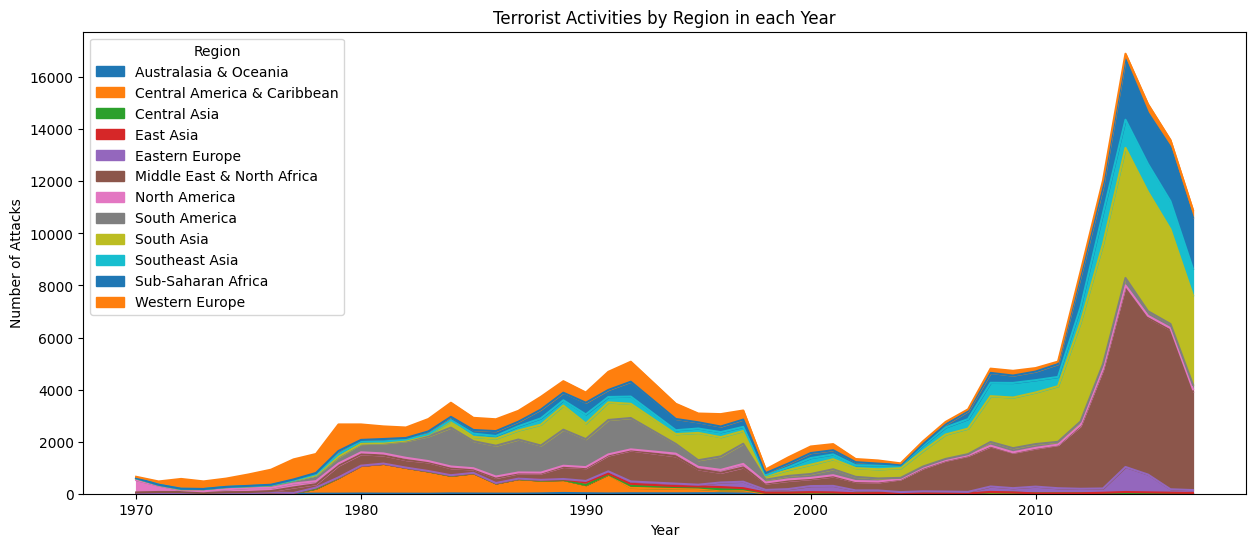

In [148]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [149]:
df.Year

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: Year, Length: 181691, dtype: int64

In [150]:
attacks=df["Year"]
attacks=attacks.value_counts(dropna=False).to_frame().rename(columns={"index":"Year","Year":"Attacks"})
attacks.head(5)

,count
Year,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900


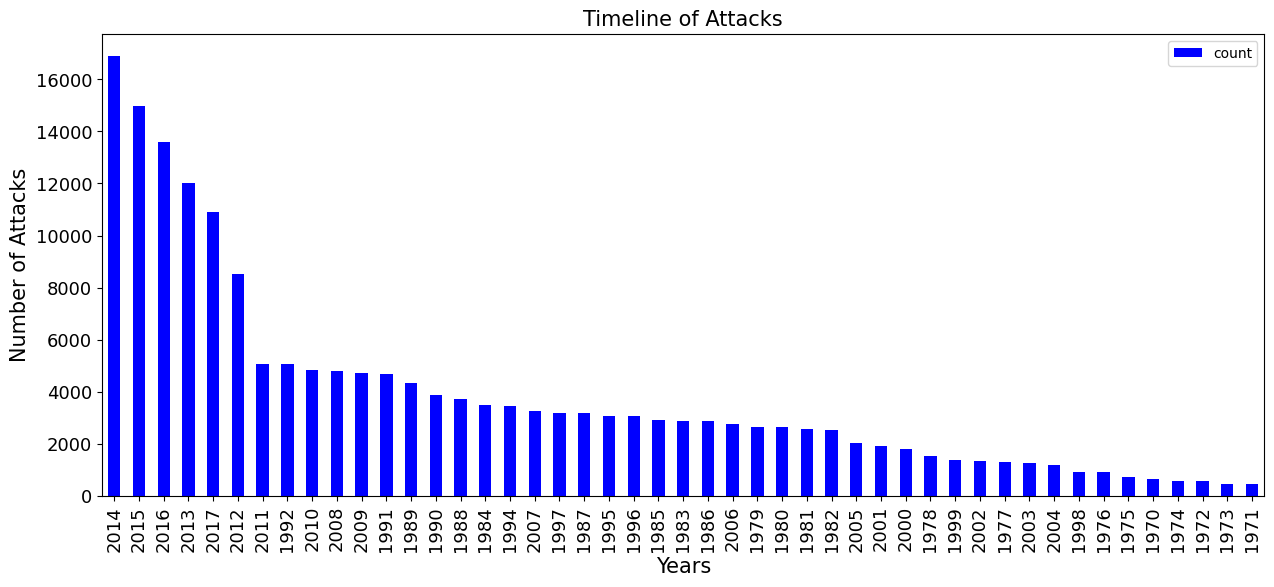

In [151]:
attacks.plot(kind="bar",color="blue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [152]:
x=df[["Year","Wounded"]].groupby("Year").sum()
x.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


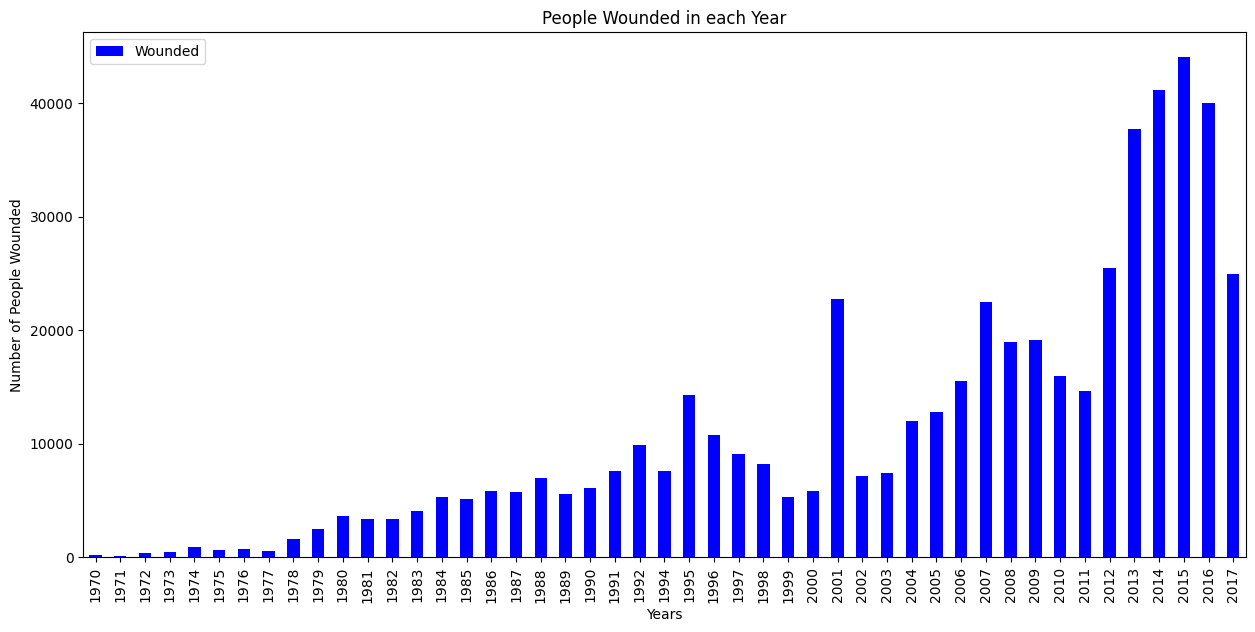

In [153]:
fig=plt.figure()
ax1=fig.add_subplot(2,1,2)
x.plot(kind="bar",color="blue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [154]:
x=df[["Year","Killed"]].groupby("Year").sum()
x.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


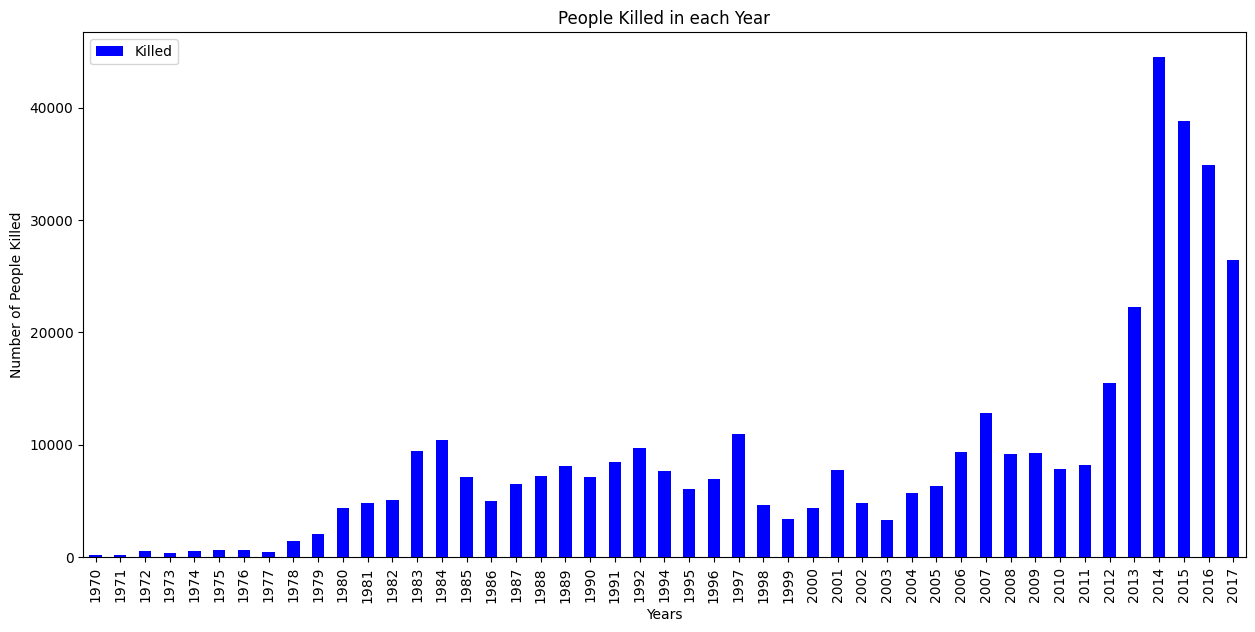

In [155]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)

x.plot(kind="bar",color="blue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed") 
plt.show()

In [156]:
country=df["Country"].value_counts().head(10)
country

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

In [157]:
ck=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
ck.head(5)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0


In [158]:
cw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cw.head(5)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0


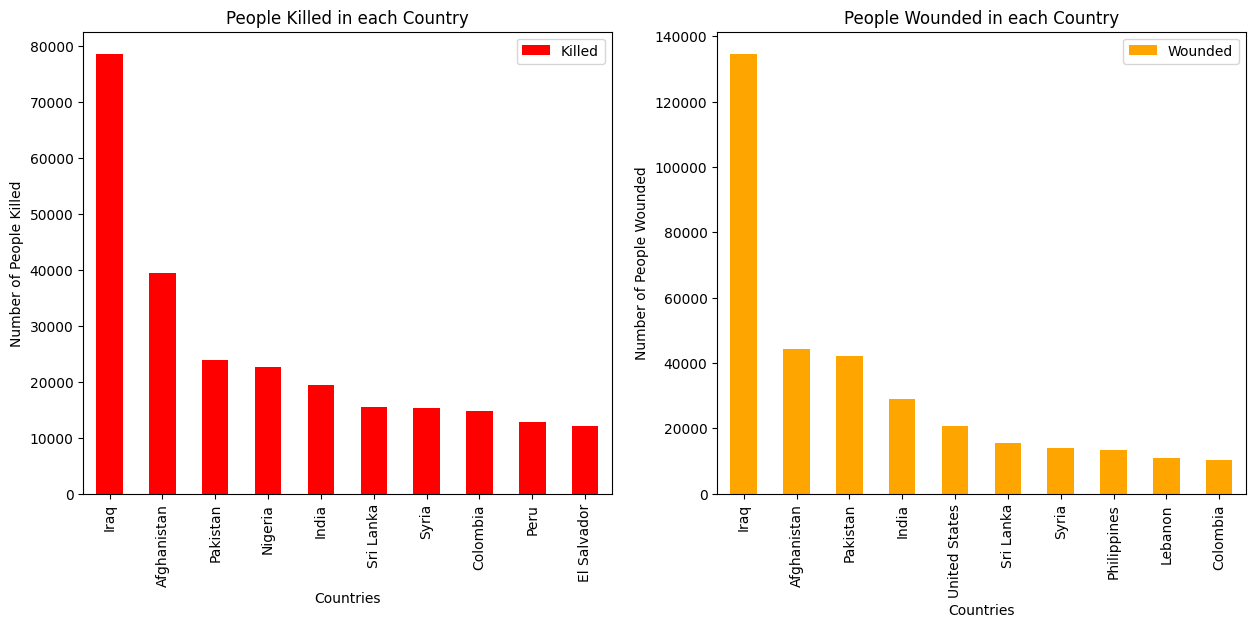

In [159]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

ck[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

cw[:10].plot(kind="bar",color="orange",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [160]:
city=df["city"].value_counts()[1:11]
city

city
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: count, dtype: int64

In [161]:
ck=df[["city","Killed"]].groupby("city").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(5)

,Killed
city,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0


In [162]:
cw=df[["city","Wounded"]].groupby("city").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(5)

,Wounded
city,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0


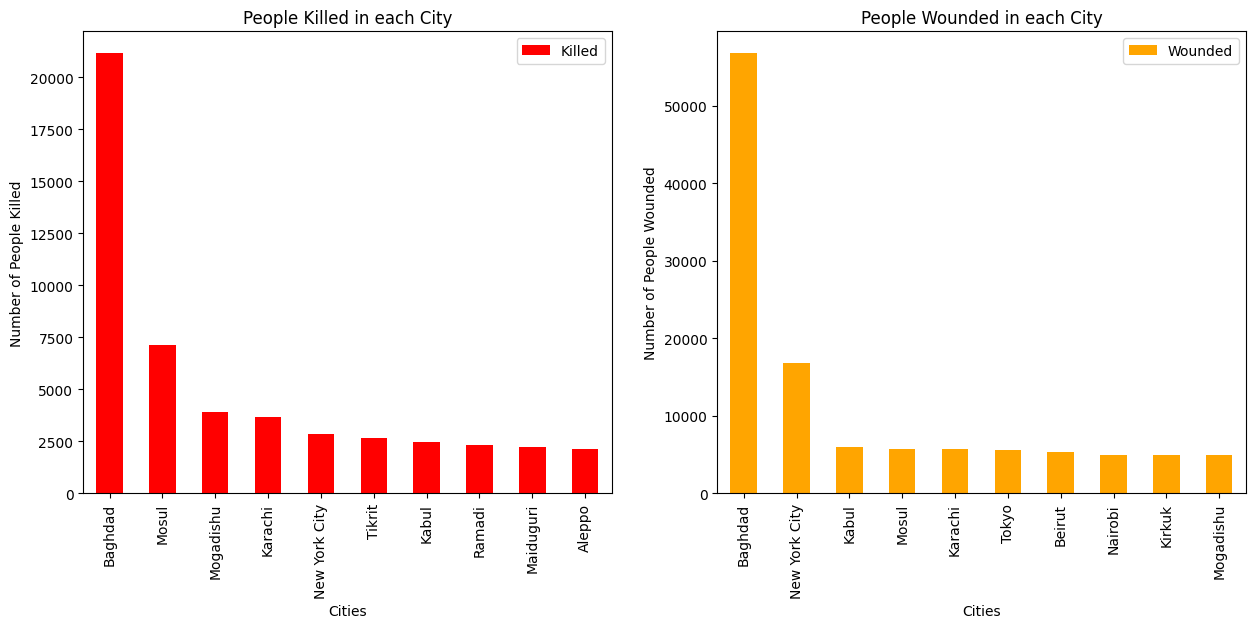

In [163]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
cw[:10].plot(kind="bar",color="orange",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

In [164]:
df.columns

Index(['EventID', 'Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [165]:
grp=df["Group"].value_counts()[1:10]
grp

Group
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: count, dtype: int64

In [166]:
gw=df[["Group","Wounded"]].groupby("Group").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(5)

,Wounded
Group,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0


In [167]:
gk=df[["Group","Killed"]].groupby("Group").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(5)

,Killed
Group,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0


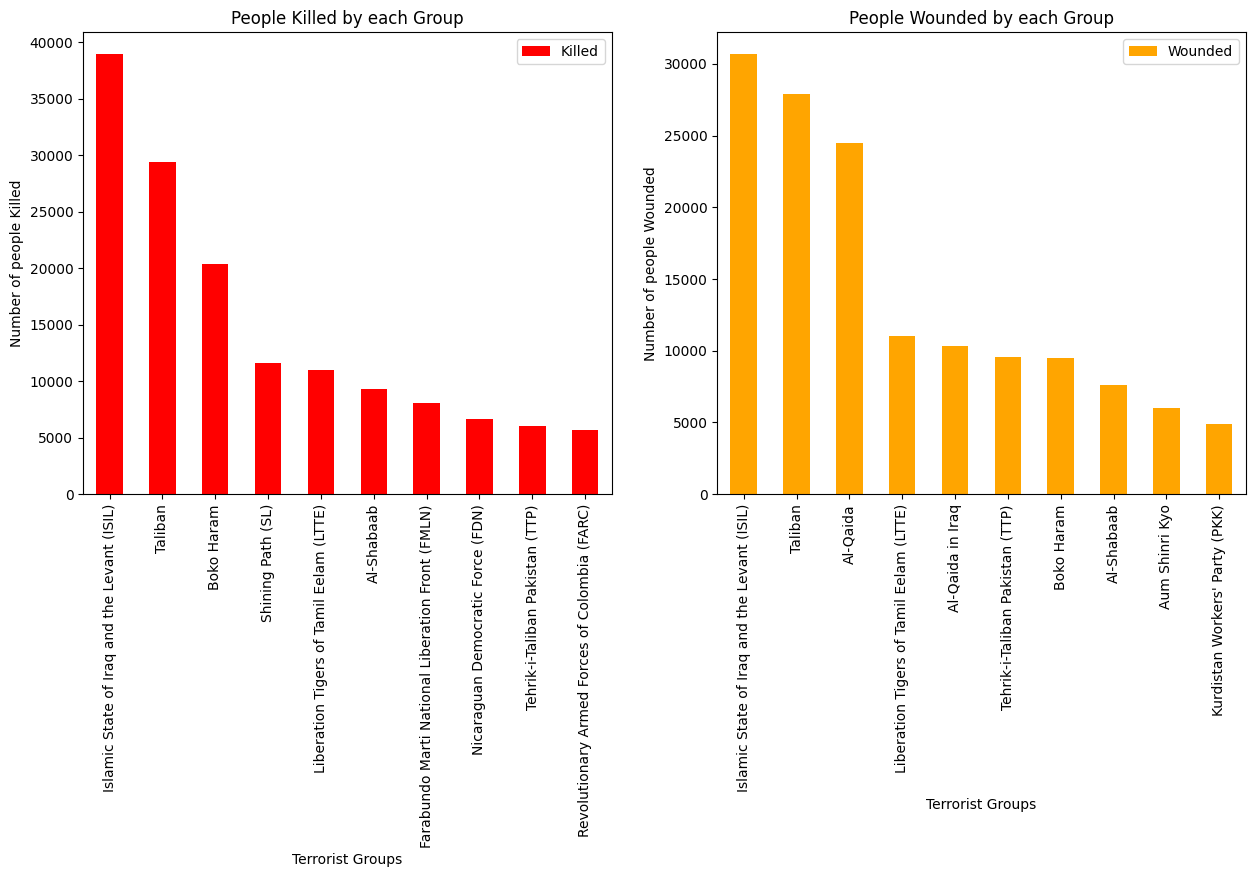

In [168]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="red",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
gw[:10].plot(kind="bar",color="orange",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

In [169]:
tt=df['Target_type'].value_counts()[1:10]
tt

Target_type
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Name: count, dtype: int64

In [170]:
tw=df[["Target_type","Wounded"]].groupby("Target_type").sum().sort_values(by="Wounded",ascending=False)
tw.head(5)

,Wounded
Target_type,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0


In [171]:
tk=df[["Target_type","Killed"]].groupby("Target_type").sum().sort_values(by="Killed",ascending=False)
tk.head(5)

,Killed
Target_type,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0


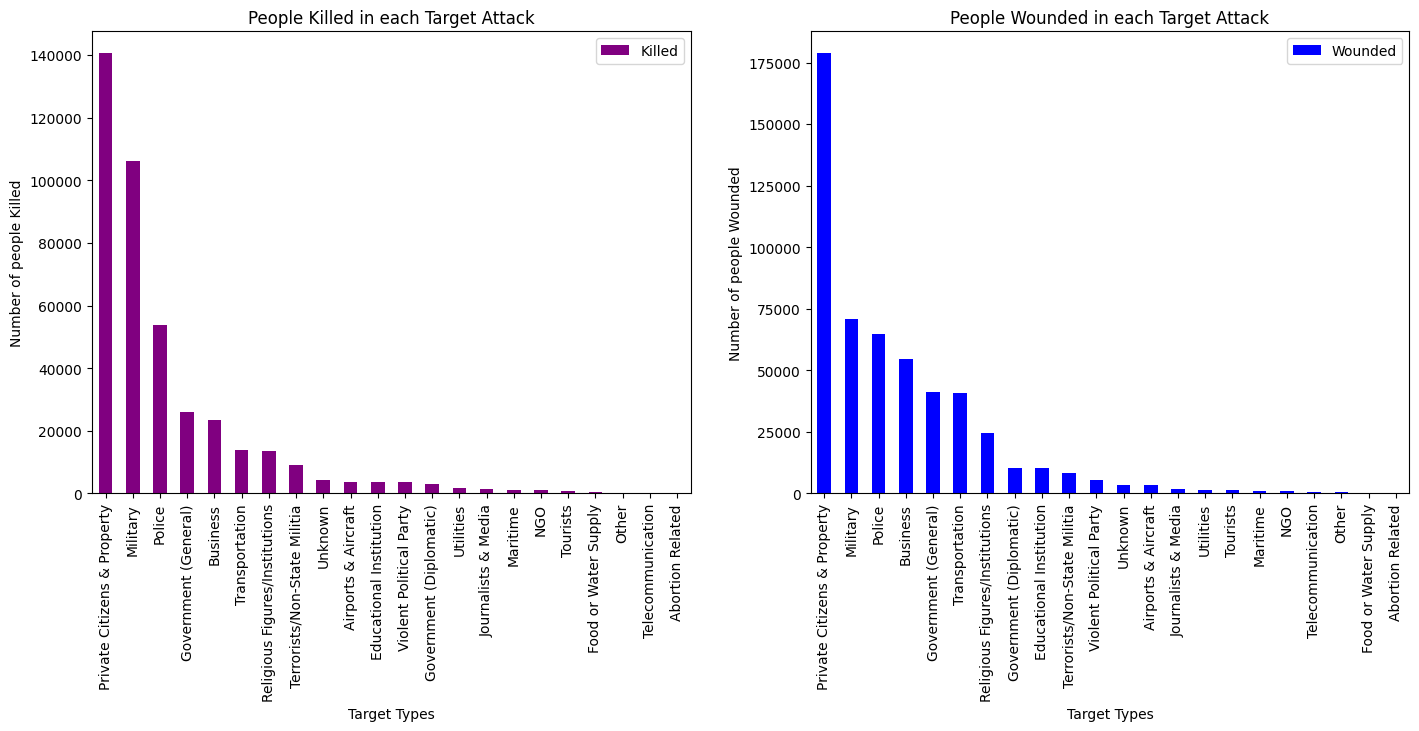

In [172]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tk.plot(kind="bar",color="purple",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
tw.plot(kind="bar",color="blue",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

In [173]:
a=df["AttackType"].value_counts()[1:10]
a

AttackType
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

In [174]:
ak=df[["AttackType","Killed"]].groupby("AttackType").sum().sort_values(by="Killed",ascending=False)
ak

,Killed
AttackType,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


In [175]:
aw=df[["AttackType","Wounded"]].groupby("AttackType").sum().sort_values(by="Wounded",ascending=False)
aw

,Wounded
AttackType,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


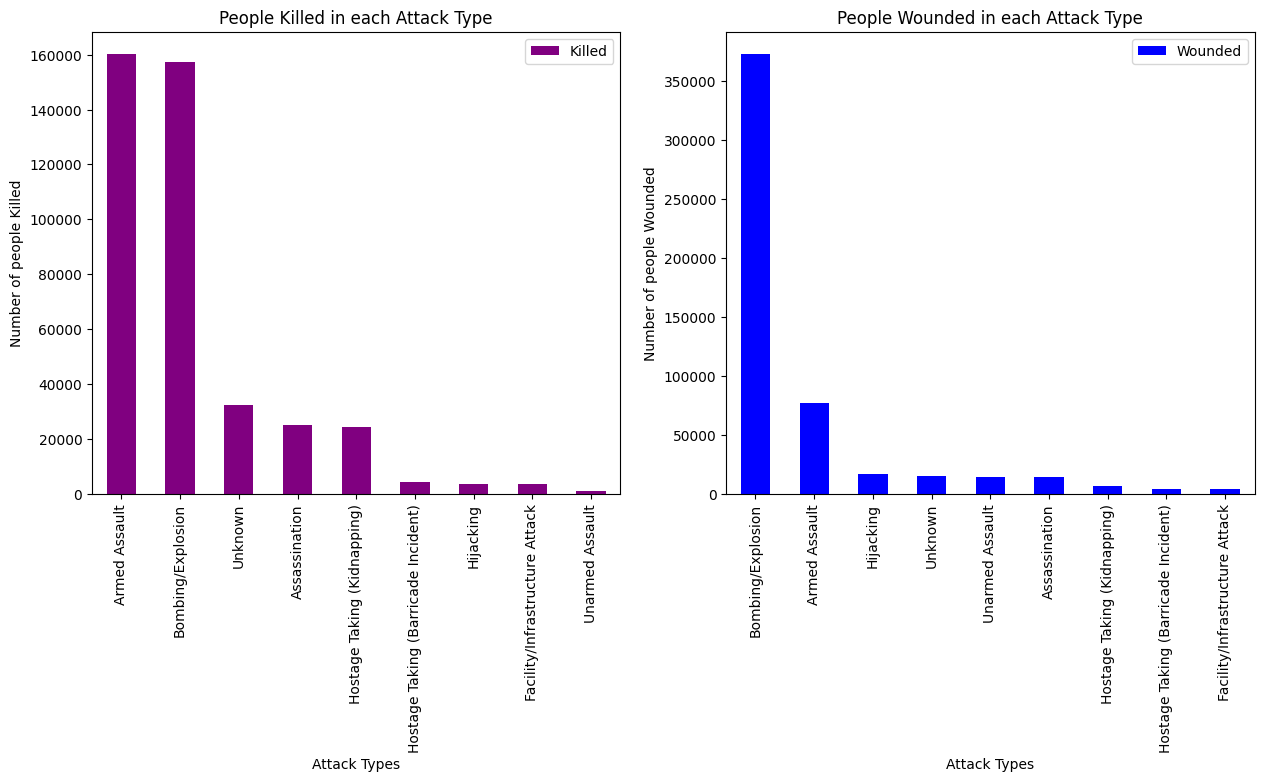

In [176]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ak.plot(kind="bar",color="purple",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
aw.plot(kind="bar",color="blue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

In [177]:
df.columns

Index(['EventID', 'Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [178]:
tm=df[["Target_type","Motive"]].value_counts()
tm.head(10)

Target_type                  Motive                                        
Private Citizens & Property  The specific motive for the attack is unknown.    4684
                             Unknown                                           4049
Government (General)         The specific motive for the attack is unknown.    2445
Police                       Unknown                                           2409
Government (General)         Unknown                                           1965
Military                     Unknown                                           1893
Business                     The specific motive for the attack is unknown.    1635
Police                       The specific motive for the attack is unknown.    1528
Business                     Unknown                                           1420
Transportation               Unknown                                            714
Name: count, dtype: int64

In [179]:
tmk=df[["Target_type","Motive","Killed"]].groupby(["Target_type","Motive"],axis=0).sum().sort_values(by="Killed",ascending=False).head(10)
tmk

Killed
Target_type                    Motive                                                 
Private Citizens & Property    Unknown                                         21440.0
                               The specific motive for the attack is unknown.   9361.0
Military                       Unknown                                          7954.0
Police                         Unknown                                          7227.0
Government (General)           Unknown                                          3884.0
                               The specific motive for the attack is unknown.   3377.0
Business                       Unknown                                          2782.0
Police                         The specific motive for the attack is unknown.   2687.0
Transportation                 Unknown                                          2617.0
Religious Figures/Institutions Unknown                                          2490.0

In [180]:
tmw=df[["Target_type","Motive","Wounded"]].groupby(["Target_type","Motive"],axis=0).sum().sort_values(by="Wounded",ascending=False).head(10)
tmw

Wounded
Target_type                    Motive                                                 
Private Citizens & Property    Unknown                                         45047.0
                               The specific motive for the attack is unknown.  20204.0
Police                         Unknown                                         11652.0
Military                       Unknown                                          9994.0
Transportation                 Unknown                                          7664.0
Business                       Unknown                                          7639.0
Government (General)           The specific motive for the attack is unknown.   7225.0
                               Unknown                                          6575.0
Business                       The specific motive for the attack is unknown.   6212.0
Religious Figures/Institutions Unknown                                          5227.0

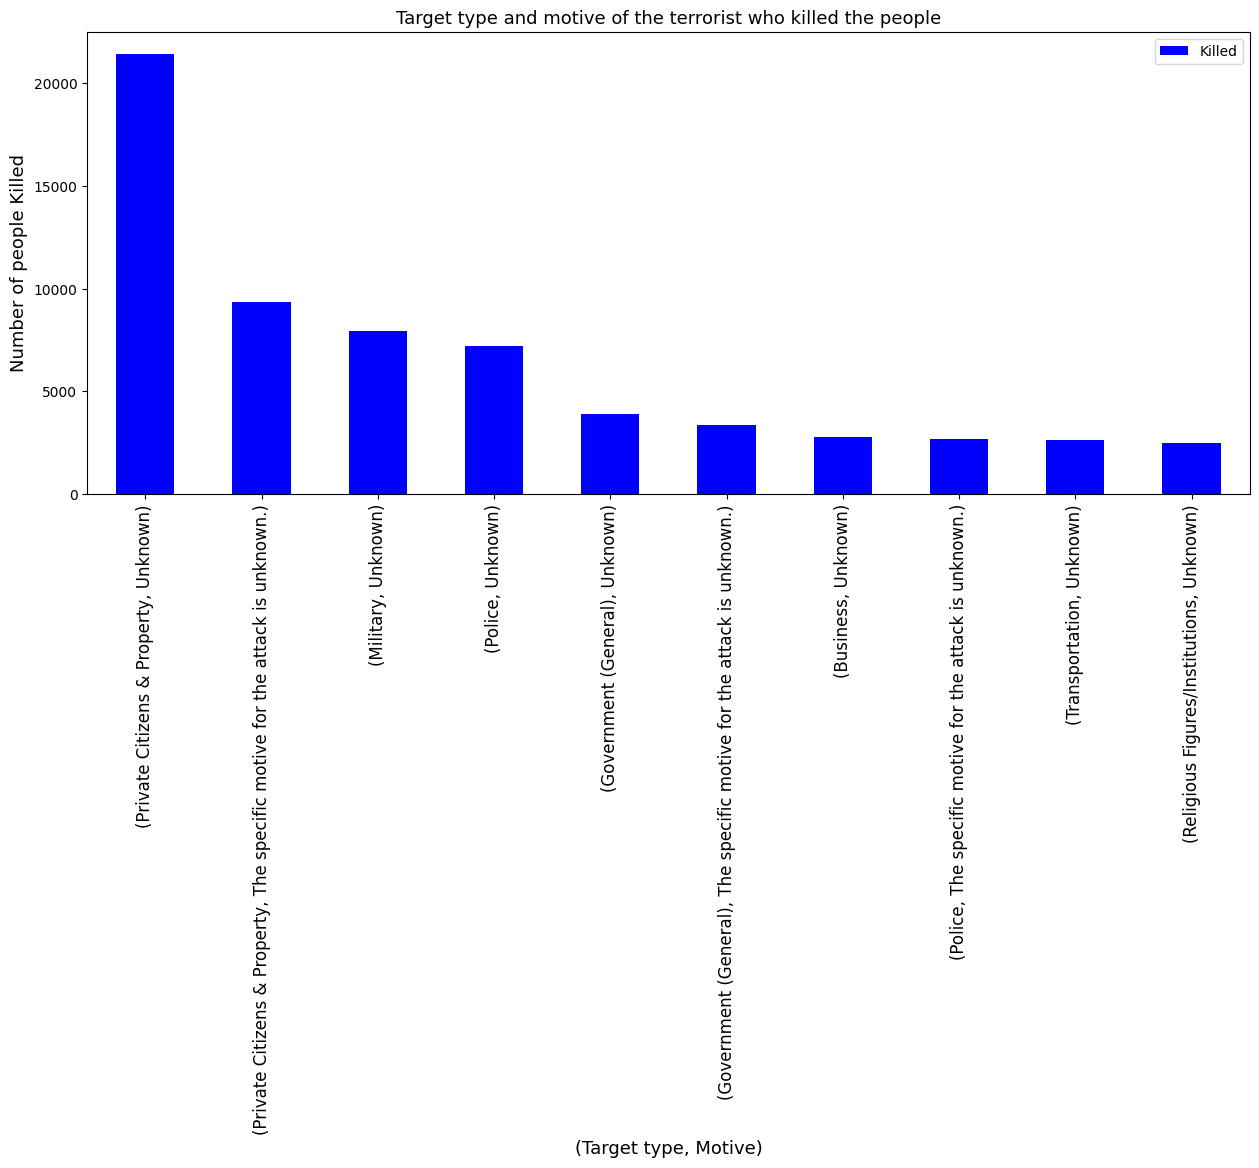

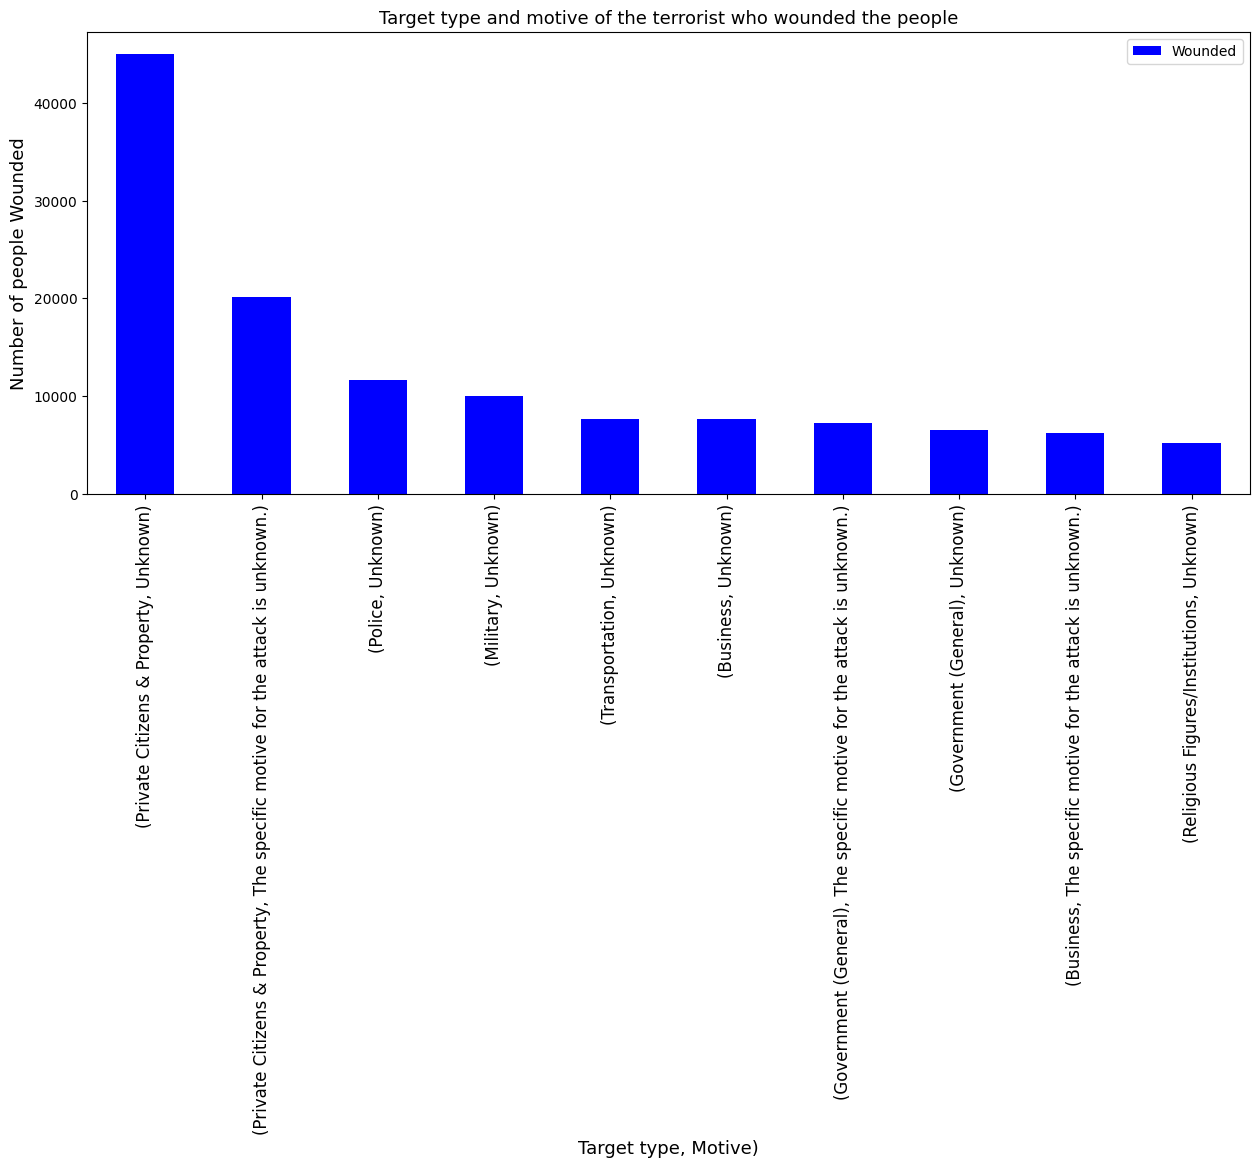

In [181]:
tmk.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Target type and motive of the terrorist who killed the people",fontsize=13)
plt.xlabel("(Target type, Motive)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Killed",fontsize=13)
plt.show()

tmw.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Target type and motive of the terrorist who wounded the people",fontsize=13)
plt.xlabel("Target type, Motive)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=13)
plt.show()

In [182]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 411868.0


In [183]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0


 # **OBSERVATIONS:**

> # **Temporal Analysis:**
> Trend in Attacks: There's an increasing trend in terrorist activities from 2013 to 2014 but a subsequent decrease afterward, indicating fluctuations in global terrorism.
> 
> # **Fatalities and Injuries:**
> The number of fatalities and injuries due to terrorist attacks is substantial. Both fatalities and injuries show peaks in certain years, indicating high-impact incidents.
> 
> # **Year-wise Casualties:** 
> Certain years had a significantly higher number of casualties, emphasizing the variability in the impact of attacks over time.
> 
> # **Geographic Analysis:**
> 
> **Top Affected Countries:**
> Iraq, Pakistan, Afghanistan, India, and Colombia were among the countries most affected by terrorism. Iraq and Afghanistan, in particular, suffered the highest number of casualties.
> 
> **Most Targeted Cities:**
> Baghdad, Karachi, Lima, and Mosul were some of the cities most frequently targeted by terrorist activities.
> 
> **Impact of Terrorist Groups:**
> Groups like Taliban, ISIL, and Boko Haram were responsible for a considerable number of casualties, highlighting their significant impact.
> 
> # **Types of Attacks and Targets:**
> 
> **Common Attack Types:**
> Armed assaults, bombings, assassinations, and hostage takings were among the most common methods used in terrorist attacks.
> 
> **Target Analysis:**
> Private citizens and property, military, police, and government institutions were the primary targets, experiencing high casualties.
> 
> # **Motives and Trends:**
> 
> **Motive behind Attacks:**
> A significant portion of attacks had motives listed as unknown or unspecified, highlighting the challenge in understanding the underlying reasons.
> 
> **Impact on Civilians:**
> Attacks on private citizens and property resulted in the highest number of casualties, indicating the impact on civilians.
> 
> # **Data Limitations:**
> 
> **Incomplete or Missing Information:**
> There were several instances where crucial data, such as motives or specific details of attacks, was unavailable or incomplete.
> 
> **Data Bias:** 
> Certain regions or groups might have more reported incidents due to various factors like reporting bias, media coverage, or political interest.
> 

# **Security issues and insight from the EDA**

> -> The government should decisively fortify border security.
> 
> -> Stringent immigration laws and regulations must be established.
> 
> -> It is imperative to limit access to lethal weaponry.
> 
> -> States ought to ensure their internal security.